# Intermediate Task

### 1. What do you know about missing values in the data? Also, tell some different techniques to handle them.


- Missing values in the data can occur for reasons like: data entry error or collecting data error
- We have two types of missing data: missing numerical values and missing categorical values.
- We can handle them by asking some questions like:
    - What are the features(variables)?
    - What are the supposed types of these features(int, float, bool, string)?
    - If pandas can detect missing values or not like: n/a, na, --, etc.
- We can **delete** missing values like deleting the entire row that containing the missing value, or we can remove the entire column if it has more than half of missing values.
- Popular approaches for **filling** missing numerical variables is mean or median or constant imputaion due to data nature.
- For categrorical variables: we can make a new category(UNKNOWN) or to impute them with the mode of the values(most frequent values).
- Or we can even use machine learning to predict them like regression imputaion.

### 2. In your opinion, which is better to use (Pie-chart vs Barplot vs Histplot). Support your answer with an example.

Actually it depends on the kind of the variable we want to represent, so if we want to represent countinous data like showing the distribution of weights or heights we use **Histplots**, if we want to represent categorical data we can use Pie-charts or Barplots, **Pie-charts** if we want to represent the proportion of categories as part of a whole like proportion of population in each governorate in Egypt, and **Barplots** if we want to represent frequencies of different categories like number of employed, non-employed and retired in a governorate.

### 3.  What is the difference between explanatory data analysis and exploratory data analysis?

**Exploratory** data analysis comes first because it's crucial to understand, explore and gain insights of the data before explaining it to others, while **Explanatory** data analysis is presenting and explaining the data to people so it requires their understanding of the data and what they care of, in other words we can say it's storytelling of data.

### 4. Now for the big part: EDA on Titanic dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
data.isnull().sum()[data.isnull().sum() > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [7]:
data.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum().any()

False

In [10]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
print("Proportions of survived genders:", str(data[data['Survived'] == 1]['Sex'].value_counts() / len(data[data['Survived'] == 1]) * 100), '\n', \
      "Proportion of not survived genders:", str(data[data['Survived'] == 0]['Sex'].value_counts() / len(data[data['Survived'] == 0]) * 100), sep='\n')

Proportions of survived genders:
female    67.708333
male      32.291667
Name: Sex, dtype: float64


Proportion of not survived genders:
male      84.90566
female    15.09434
Name: Sex, dtype: float64


In [12]:
data['Family'] = data['SibSp'] + data['Parch'] + 1
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [13]:
data['Family'].value_counts()

1    402
2    139
3     93
4     27
6     22
7     12
5     11
8      6
Name: Family, dtype: int64

In [14]:
data['IsAlone'] = data['Family'].apply(lambda x: 1 if x == 1 else 0)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,IsAlone
0,0,3,male,22.0,7.2500,S,2,0
1,1,1,female,38.0,71.2833,C,2,0
2,1,3,female,26.0,7.9250,S,1,1
3,1,1,female,35.0,53.1000,S,2,0
4,0,3,male,35.0,8.0500,S,1,1


In [15]:
data.groupby(['IsAlone', 'Sex', 'Survived'])['Survived'].count()

IsAlone  Sex     Survived
0        female  0            43
                 1           118
         male    0           107
                 1            42
1        female  0            21
                 1            77
         male    0           253
                 1            51
Name: Survived, dtype: int64

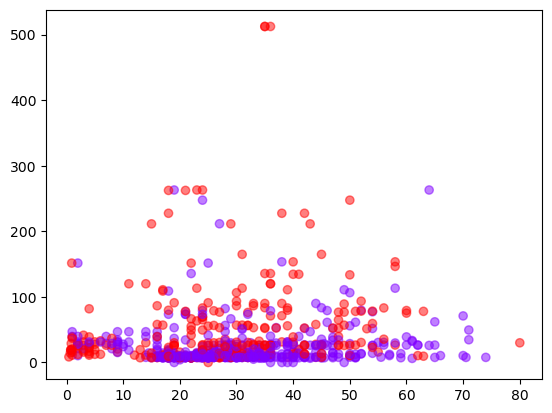

In [16]:
plt.scatter(data['Age'], data['Fare'], c=data['Survived'], cmap='rainbow', alpha=0.5)

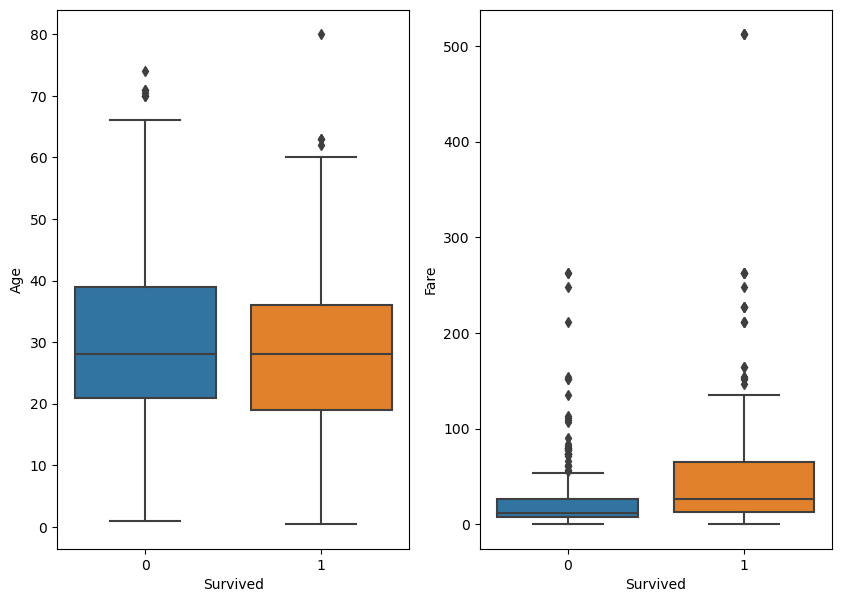

In [17]:
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x='Survived', y='Age', data=data)

plt.subplot(1, 2, 2)
sns.boxplot(x='Survived', y='Fare', data=data)

plt.show()

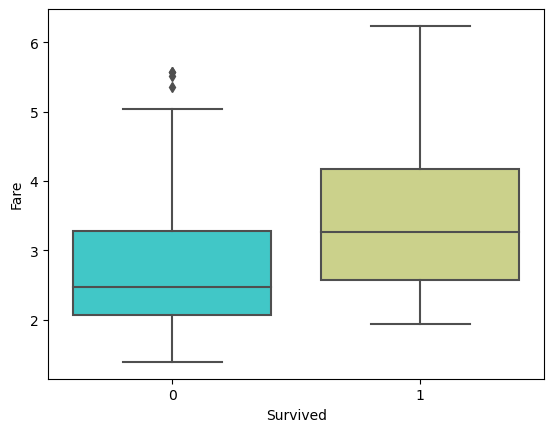

In [18]:
data['Fare'] = np.log(data['Fare'])

sns.boxplot(x='Survived', y='Fare', data=data, palette='rainbow')

plt.show()

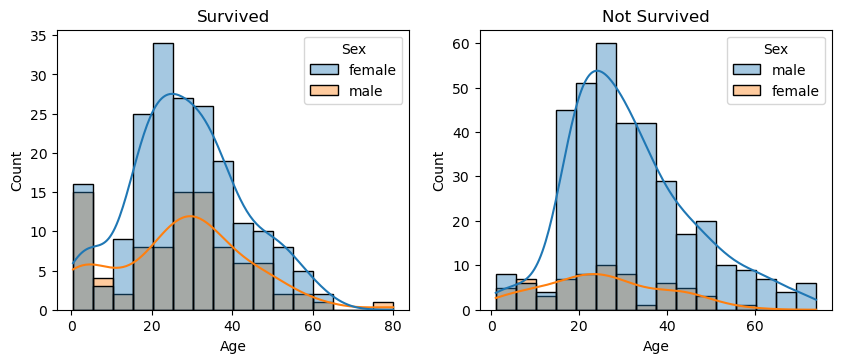

In [19]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title('Survived')
sns.histplot(data[data['Survived'] == 1], x = 'Age', kde=True, hue='Sex', alpha=0.4)

plt.subplot(2, 2, 2)
plt.title('Not Survived')
sns.histplot(data[data['Survived'] == 0], x= 'Age', kde=True, hue='Sex', alpha = 0.4)
plt.show()

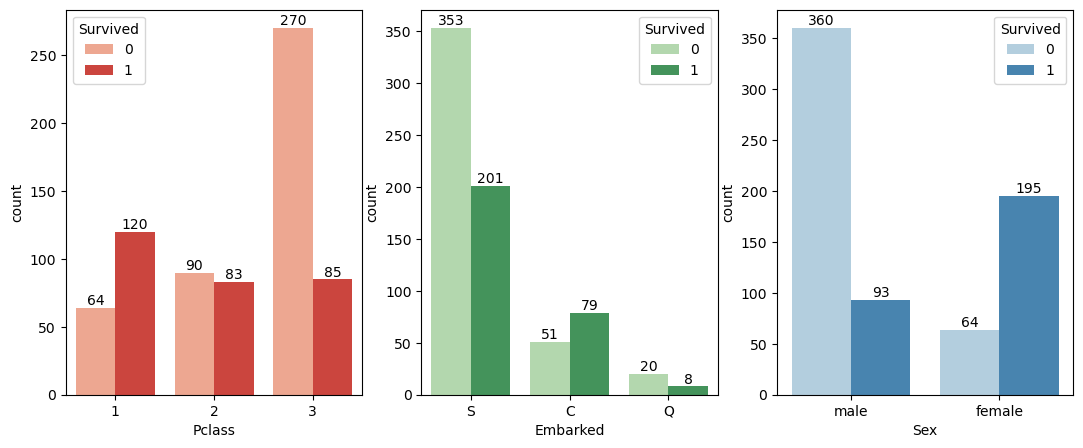

In [20]:
plt.figure(figsize=(13, 5))
palette = {0: 'Reds', 1: 'Greens', 2: 'Blues',}

for i, col in enumerate(['Pclass', 'Embarked', 'Sex']):
    ax = plt.subplot(1, 3, i+1)
    sns.countplot(col, data=data, hue='Survived', palette=palette[i])
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

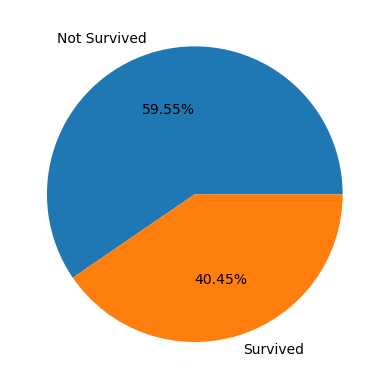

In [21]:
plt.pie(data['Survived'].value_counts(), labels=['Not Survived', 'Survived'], autopct='%1.2f%%')
plt.show()